# 项目：探索TMDB电影数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 本报告使用的数据集中包含一万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分和票房。数据保存在名为“tmdb-movies.csv”的csv文件中。    
本报告将对以下几个问题进行研究：
1. 票房的分布是否符合二八原则？
2. 最受欢迎的电影类别有哪些？
3. 每年电影票房总收入有何变化趋势？
4. 电影预算和票房收入的相关关系如何？

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## 数据整理


### 常规属性

首先将源文件“tmdb-movies.csv”包含的数据加载到数据框中，打印前5行，查看数据集的内容样式。使用数据框的 shape 属性和 info 方法、describe 方法了解数据集的更多信息。

In [192]:
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [193]:
#了解数据维度
df_movies.shape

(10866, 21)

可以看到，源数据包含了10866条记录在21个维度的信息。

In [194]:
#了解各列信息
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

除了描述时间信息的两列：‘release_date’与‘realease_year’，各列数据内容与数据类型基本匹配。(这不妨碍我们的分析，暂不做处理。)另外有些列存在数据缺失的情况，为避免缺失值对我们后续的分析造成影响，我们后面需要对缺失值进行处理。

In [195]:
#了解各列描述性统计信息
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


这里需要注意有些列如‘runtime’列存在异常值0，‘budget’、‘revenue’、‘budget_adj’、‘revenue_adj’列更是有一半多(数目很大)的数据记为0。     
其中‘runtime’列对于我们的研究没有影响，暂不修改；      
‘revenue_adj’等列则需要根据研究的问题分情况讨论。对于问题一，如果我们研究的问题为真，‘revenue_adj’列的任何修改都会大大减弱这种趋势，所以建议舍弃这些包含零值的记录；对于问题二，这些异常值对分析没有影响，可以不做处理；对于问题三，票房收入记录为0的，以**当年**票房收入的均值代替；对于问题四，可以采用和问题三相同的做法。    
关于这些记录为0的异常值，将在后面探索性数据分析阶段再进行实际处理。


### 处理缺失值     
考虑到缺失值数目较多，且这些缺失信息并不会影响到后面的分析，参照各列的数据类型，不妨各缺失值处都以"no record"填充。这里我们使用fillna函数填充缺失值，然后检查结果确认操作已生效。

In [196]:
#填充缺失值，然后再次检查
df_movies.fillna('no record', inplace=True)
df_movies.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### 处理重复行    
在正式进行探索性数据分析之前，我们还要检查数据是否有重复行。

In [197]:
#检查重复行
df_movies.duplicated().sum()

1

发现有一行重复数据。我们将它删除，然后再次查重确认操作已生效。

In [198]:
#删除重复行，然后检查
df_movies.drop_duplicates(inplace=True)
df_movies.duplicated().sum()

0

经过处理后，我们得到一个包含10865条无重复、无缺失值记录的电影数据集。我们接下来使用这个处理后的数据集进行探索。

<a id='eda'></a>
## 探索性数据分析


### 研究问题 1（电影票房收入是否符合二八原则？ ）
二八法则，又称帕累托法则，它指出在任何一组东西中，最重要的只占其中一小部分，约20%，其余80%尽管是多数，却是次要的。所以我们的问题实际上就是：电影市场中20%的电影能否占据80%的票房收入？    
为了完成这项研究，我们将对票房收入从高到低排序，通过while循环将各电影票房从高到低相加，直到达到所有电影票房的二八分界值。由于电影涉及不同的年份，我们将参照经过通胀处理后的票房收入(revenue_adj)。

In [199]:
#确定二八分界值
total_revenue = df_movies['revenue_adj'].values.sum()
mark = total_revenue * 0.8

#筛选出票房收入不为0的信息，按票房收入排序
df_sorted_movies = df_movies.query('revenue_adj != 0').sort_values(by=['revenue_adj'], ascending=False)
revenue = df_sorted_movies['revenue_adj'].values

In [200]:
#确定占票房市场总额80%的电影数量
i = 0
x = 0

while x < mark:
    x = x + revenue[i]
    i = i + 1
print('{:.0%} movies occupied {:.0%} revenue.'.format\
      ((i - 1) / df_sorted_movies.shape[0], x / total_revenue))

28% movies occupied 80% revenue.


以上结果说明：占总数28%的电影贡献了80%的总票房收入。虽然数值没有严格符合20-80，但我们认为符合二八原则描述的现象，即少数头部电影贡献了大部分票房收入。

### 研究问题 2（最受欢迎的电影类别有哪些？）

为研究这个问题，我们将根据受欢迎程度（popularity）将数据分组，按照四分位数将其受欢迎程度分为A B C D几等，其中A代表受欢迎程度最高，B次之，以此类推。通过对最受欢迎的A类电影的电影类别（genres）的分析，我们将找到最受欢迎的电影类别模式。

In [201]:
#获取受欢迎程度的四分位数
df_movies['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

In [202]:
#将电影按受欢迎程度分为ABCD四等
df_movies['pop_level'] = pd.cut(df_movies['popularity'], \
                                [0.00, 0.20, 0.38, 0.71, 32.99], labels=['D', 'C', 'B', 'A'])

打印前五行可以看到在数据框的末尾成功创建了这一列。

In [203]:
df_movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,pop_level
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,A
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,A
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,A
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,A
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,A


将评级为A的电影信息筛选出来，获取其电影类型信息。这里由于每部电影有多个类别，且由分隔符‘|’连接起来，我们首先要将类别分离。

In [204]:
df_clean = df_movies.query('pop_level =="A"')
df_clean = df_clean.drop('genres', axis=1).join(df_clean['genres'].str.split('|', expand=True).stack()\
                                                .reset_index(level=1, drop=True).rename('genres'))
df_clean.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,pop_level,genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,A,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,A,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,A,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,A,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,A,Action


在最后一列中，我们看到成功分离出的电影类型。下面用value_counts函数统计每种类型出现的次数，并用柱状图表示出来。

In [205]:
genres_count = df_clean['genres'].value_counts()

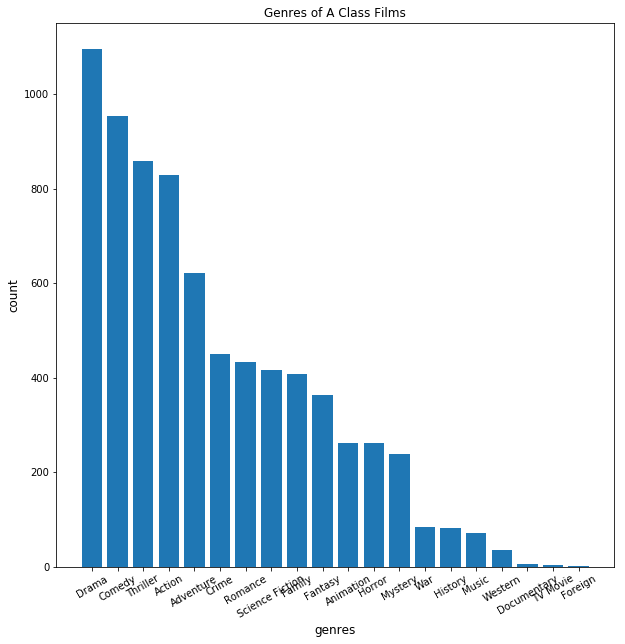

In [206]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(genres_count.index, genres_count.values)
for tick in ax1.get_xticklabels():
    tick.set_rotation(30)
ax1.set_xlabel('genres', fontsize='large')
ax1.set_ylabel('count', fontsize='large')
ax1.set_title('Genres of A Class Films');

在受欢迎的电影类别中，出现次数较多的几个类型关键词是：剧情(Drama)、喜剧(Comedy)、惊悚(Thriller)、动作(Action)、冒险(Adventure)等。可以想象，把这几个关键词中的任意两个或以上关键词结合起来，起码能成为一部好作品的市场保障。

### 研究问题 3（每年票房总收入有何变化趋势？）

首先，我们按之前分析的那样处理被记为0的数据。

In [207]:
#处理记为0的预算与票房收入，然后用describe函数检查
def fix_by_year(df, fix_col, by_col):
    years = np.sort(df[by_col].unique())
    for year in years:
        df_movies.loc[df[fix_col] == 0, fix_col] = df.query('release_year == "%s"' %year)[fix_col].mean() 

for col in 'budget','revenue','budget_adj','revenue_adj':
    fix_by_year(df_movies, col, 'release_year')
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.498564e+07,4.233596e+07,102.071790,217.399632,5.975012,2001.321859,2.021416e+07,6.986822e+07
std,92134.091971,1.000231,3.074478e+07,1.161729e+08,31.382701,575.644627,0.935138,12.813260,3.301401e+07,1.389077e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,6.892796e+05,4.531406e+06,90.000000,17.000000,5.400000,1995.000000,5.082036e+06,3.340991e+07
50%,20662.000000,0.383831,6.892796e+05,4.531406e+06,99.000000,38.000000,6.000000,2006.000000,5.082036e+06,3.340991e+07
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


处理成功。然后，我们需要将票房收入根据上映年份(release_year)聚合，这要用到groupby函数。最后我们用折线图来表示总票房收入随时间的变化。同样的，我们参照的是经通胀处理后的票房收入(revenue_adj)。

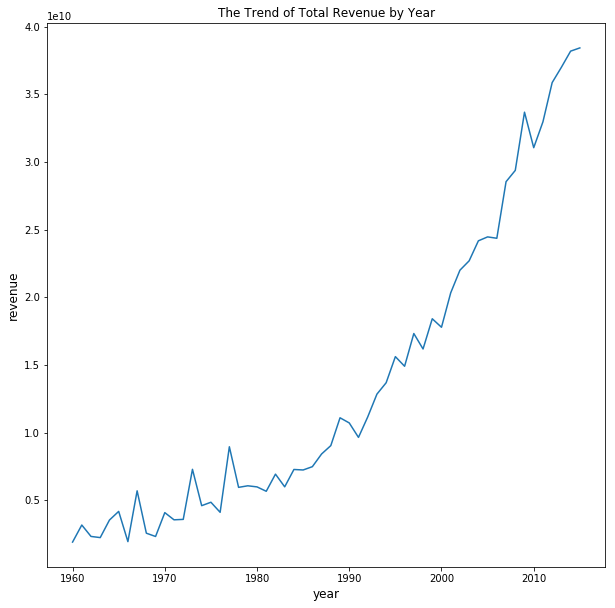

In [208]:
#按上映年份聚合票房收入
grouped_revenue = df_movies['revenue_adj'].groupby(df_movies['release_year'])

fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(1, 1, 1)
ax2.plot(grouped_revenue.sum());
ax2.set_title('The Trend of Total Revenue by Year');
ax2.set_xlabel('year', fontsize='large');
ax2.set_ylabel('revenue', fontsize='large');

折线图清晰地指出，长期来看票房总收入有逐渐上涨的趋势。

### 研究问题 4（电影预算和票房收入相关关系如何？）

我们将创建一个散点图探索这两个数据之间的关系。

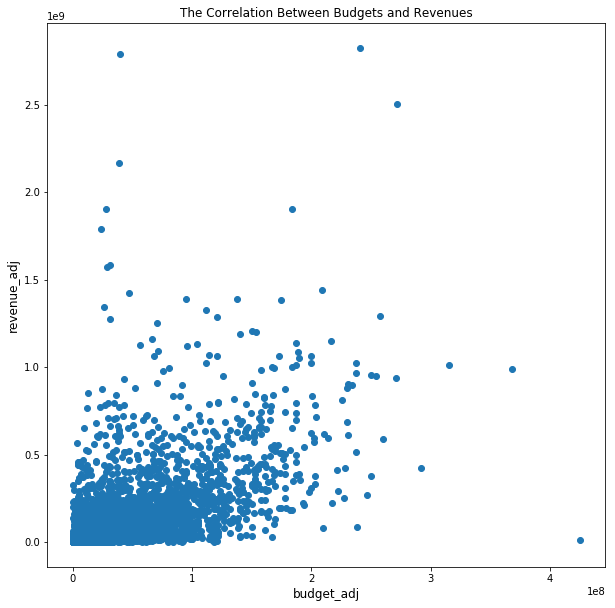

In [209]:
fig3 = plt.figure(figsize=(10, 10))
ax3 = fig3.add_subplot(1, 1, 1)
ax3.scatter(df_movies['budget_adj'], df_movies['revenue_adj'])
ax3.set_xlabel('budget_adj', fontsize='large')
ax3.set_ylabel('revenue_adj', fontsize='large')
ax3.set_title('The Correlation Between Budgets and Revenues');

从图上看起来，除了一些离群点，其他部分似乎有正向的相关关系。我们计算下相关系数：

In [210]:
df_movies['budget_adj'].corr(df_movies['revenue_adj'])

0.6208872431902944

根据研究的问题，我们认为电影预算和票房收入之间有正向的较强的相关关系。

<a id='conclusions'></a>
## 结论

> 针对最初提出的问题，可以得出以下结论：   
* 问题一：电影票房收入是否符合二八原则？28%的电影占据了80%的电影市场票房收入，我们认为这符合二八原则描述的现象，即少数头部电影贡献了大部分票房收入；    
* 问题二：最受欢迎的电影类别有哪些？通过研究受欢迎程度最高的电影，我们发现最受欢迎的电影类型为剧情(Drama)、喜剧(Comedy)、惊悚(Thriller)、动作(Action)、冒险(Adventure)等；     
* 问题三：每年电影票房总收入有何变化趋势？长期来看，票房总收入有逐年上涨的趋势；      
* 问题四：电影预算和票房收入直接相关关系如何？电影预算和票房收入的相关系数为0.62，根据研究的问题，我们认为两者之间有较强的正向相关关系。 

最后需要说明的是，以上结论只是暂时的，可能需要进一步改进。